## Решающие деревья

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style='dark')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

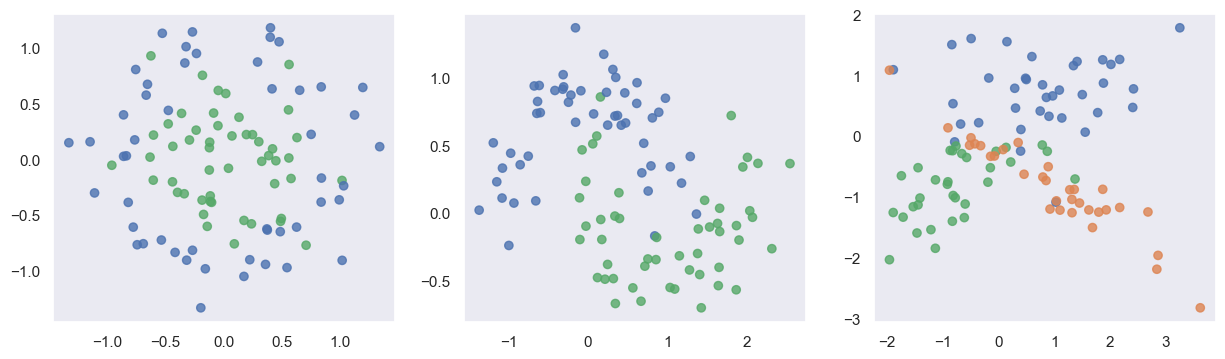

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

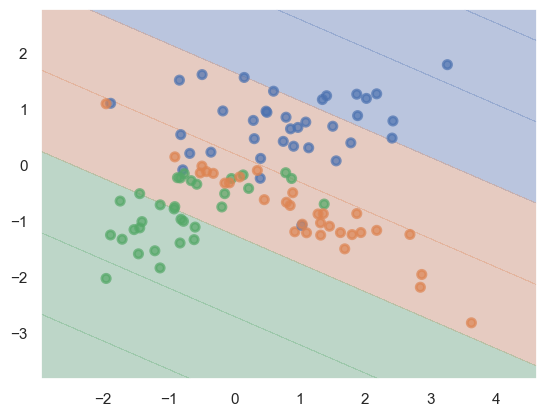

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1 | Train Accuracy: 1.00 / Test Accuracy: 0.72
Dataset 2 | Train Accuracy: 1.00 / Test Accuracy: 0.92
Dataset 3 | Train Accuracy: 1.00 / Test Accuracy: 0.72


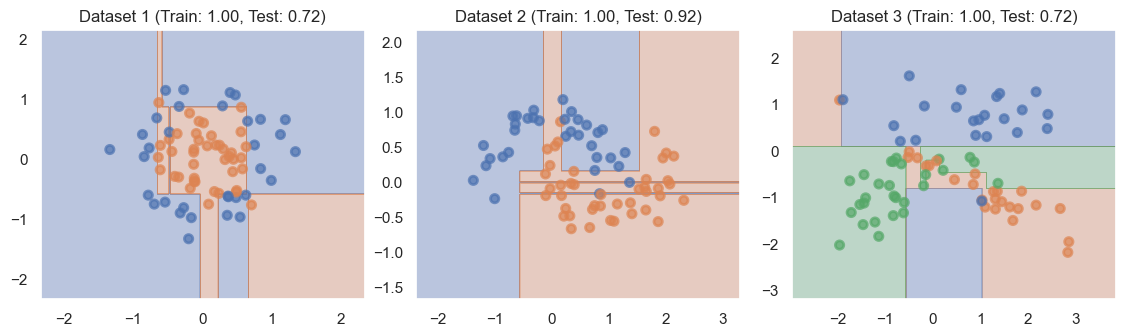

In [8]:
plt.figure(figsize=(12, 4))
for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    
    plot_surface(classifier, X_train, y_train)

    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)
    print(f"Dataset {i+1} | Train Accuracy: {train_score:.2f} / Test Accuracy: {test_score:.2f}")
    plt.title(f"Dataset {i+1} (Train: {train_score:.2f}, Test: {test_score:.2f})")

__Ответ:__ Судя по точности, равной единице на обучающей выборке, деревья переобучились, однако сохраняют "выше среднего" результат на тестовой выборке, что указывает на умеренное переобучение.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


=== Dataset 1 ===


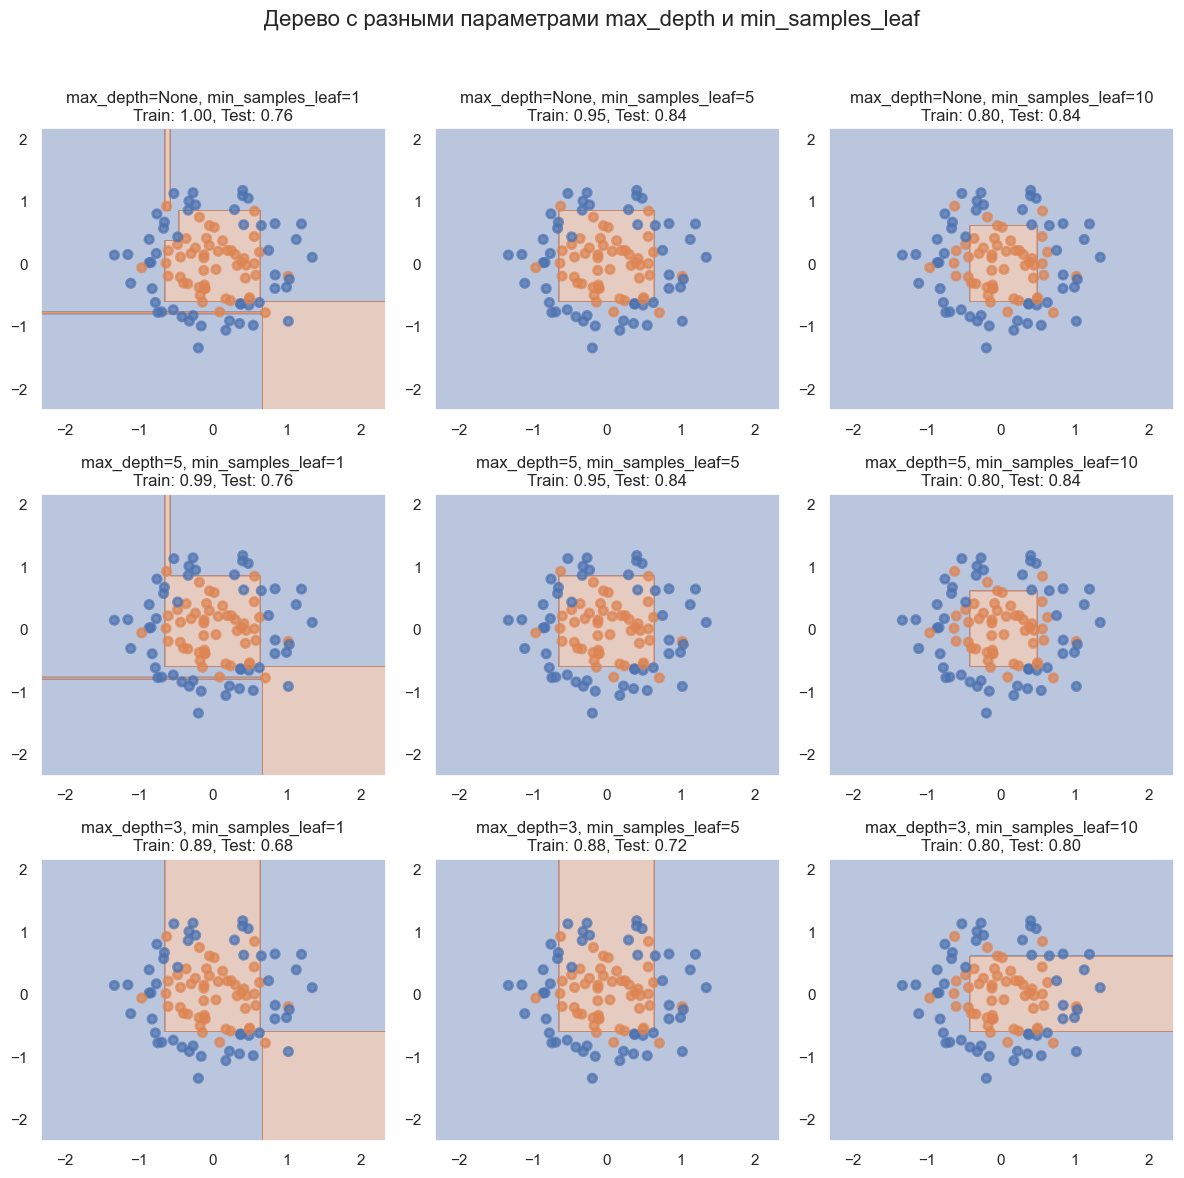


=== Dataset 2 ===


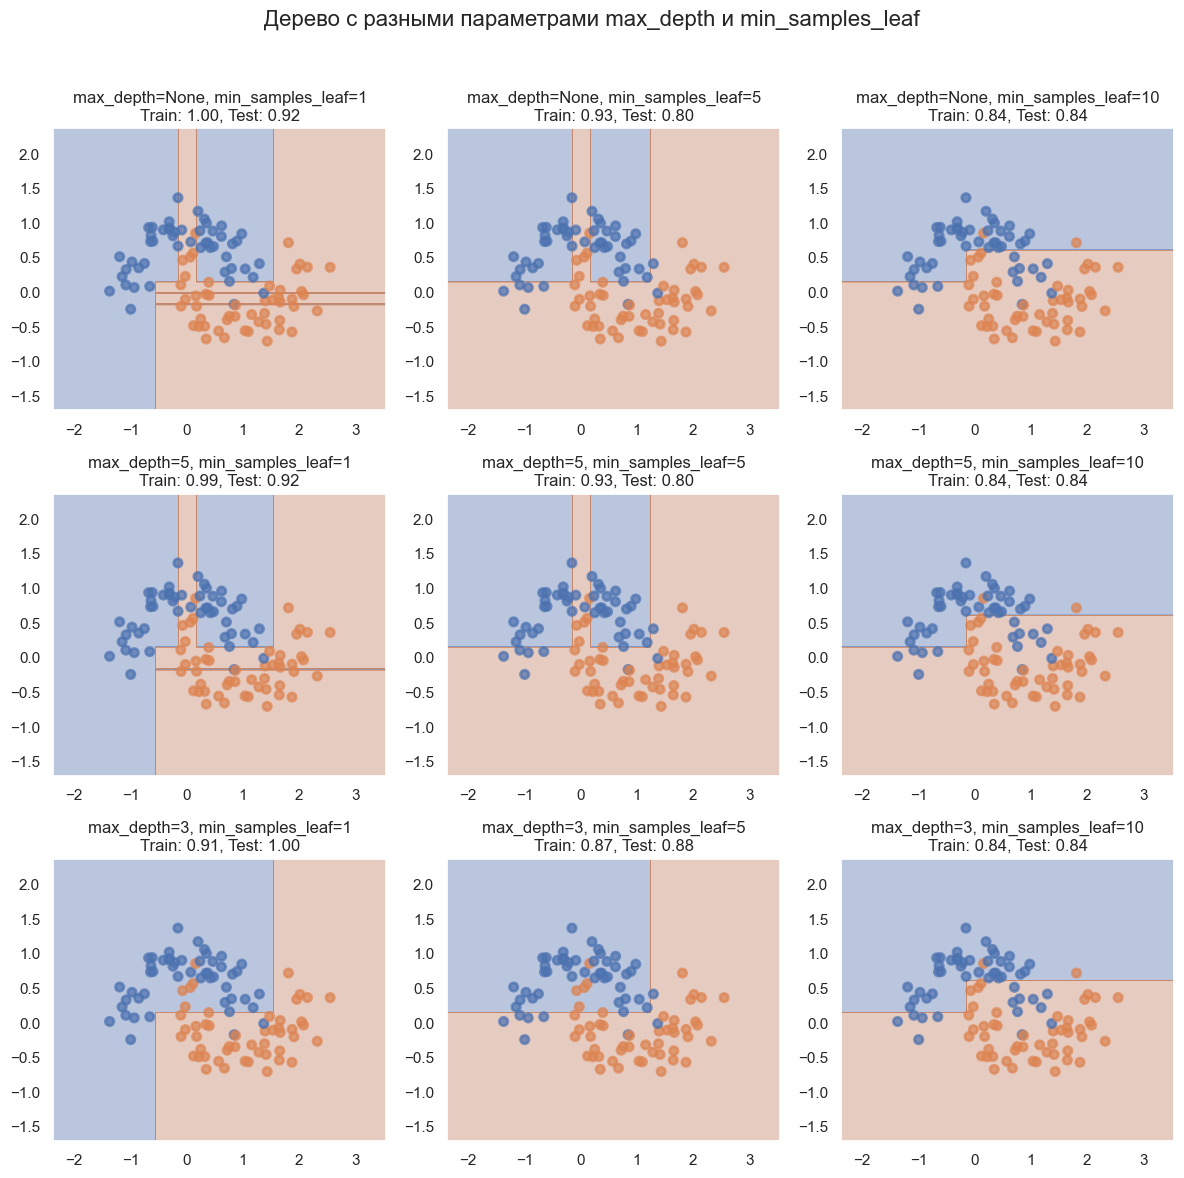


=== Dataset 3 ===


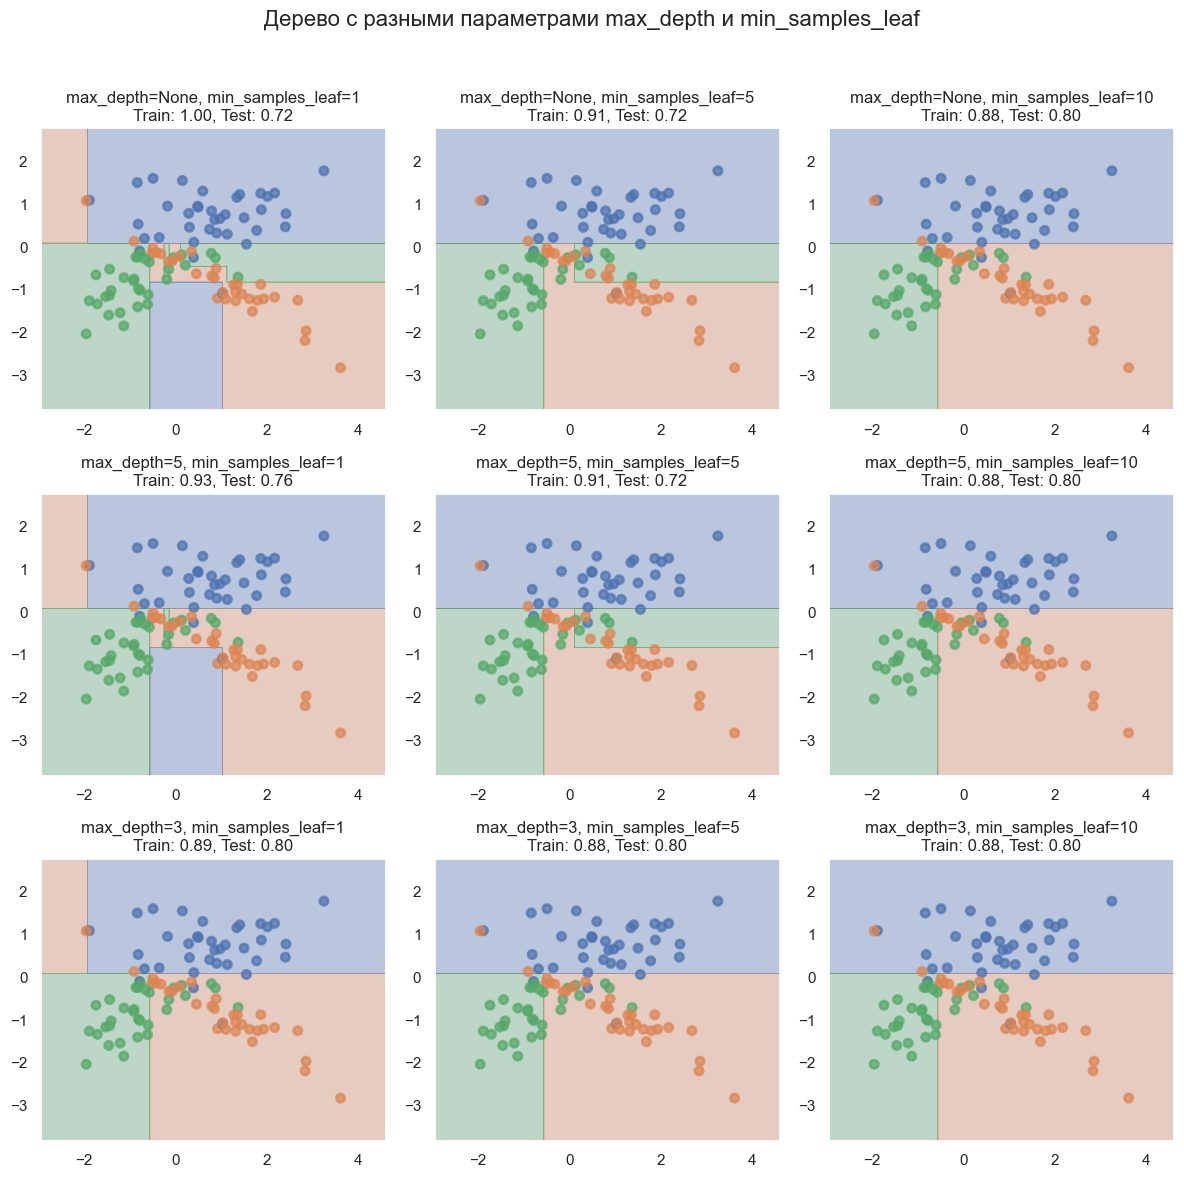

In [9]:
def visualize_decision_tree_grid_search(X, y, max_depth_values, min_samples_leaf_values):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    fig, axs = plt.subplots(len(max_depth_values), len(min_samples_leaf_values), figsize=(12, 12))
    fig.suptitle("Дерево с разными параметрами max_depth и min_samples_leaf", fontsize=16)
    
    for i, max_depth in enumerate(max_depth_values):
        for j, min_samples_leaf in enumerate(min_samples_leaf_values):
            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            tree.fit(X_train, y_train)
            
            plt.sca(axs[i, j])
            plot_surface(tree, X, y)
            
            train_score = tree.score(X_train, y_train)
            test_score = tree.score(X_test, y_test)
            
            axs[i, j].set_title(
                f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}\n"
                f"Train: {train_score:.2f}, Test: {test_score:.2f}"
            )
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

max_depth_values = [None, 5, 3]
min_samples_leaf_values = [1, 5, 10]

for idx, (X, y) in enumerate(datasets):
    print(f"\n=== Dataset {idx+1} ===")
    visualize_decision_tree_grid_search(X, y, max_depth_values, min_samples_leaf_values)

__Ответ:__ Разделяющая поверхность и обобщающая способность модели действительно меняются: с увеличением глубины деревьев алгоритм начинает замечать больше "частных" деталей в выборках.

Наоборот, при увеличении минимального числа объектов в листьях модель стремится к большему обобщению, учитывая более крупные закономерности в данных.

Эти изменения не универсальны для всех датасетов, так как данные различаются. Это подтверждается тем, что максимальная точность достигается при разных значениях параметров для каждого из них.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
data = pd.read_csv("students.csv")
data.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [11]:
last_column = data.columns[-1]
y = np.array(data[last_column])  # Целевая переменная
X = data.drop(columns=last_column)  # Признаки

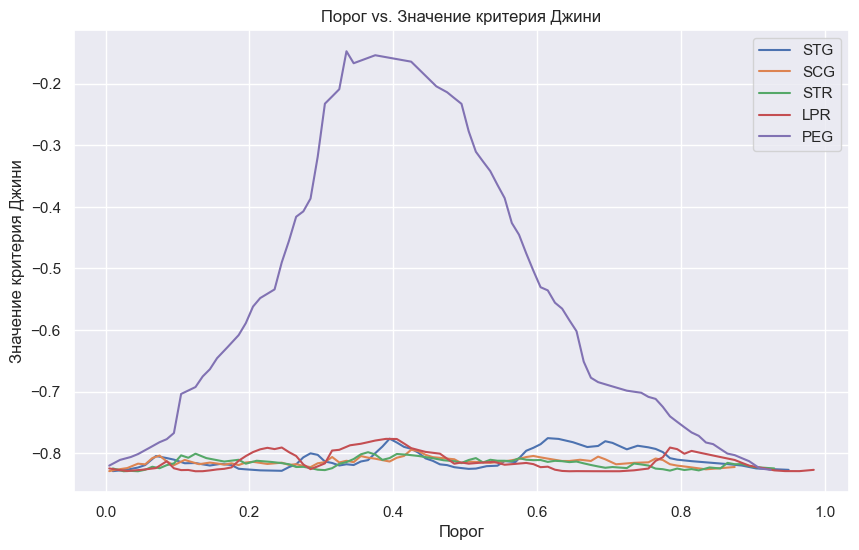

In [12]:
from hw5code import find_best_split

# Визуализация критерия Джини для каждого признака
plt.figure(figsize=(10, 6))
for i, column in enumerate(X.columns):
    feature_vector = np.array(X[column])
    thresholds, gini, threshold_best, gini_best = find_best_split(feature_vector, y)
    plt.plot(thresholds, gini, label=column)
    

plt.legend()
plt.xlabel("Порог")
plt.ylabel("Значение критерия Джини")
plt.title("Порог vs. Значение критерия Джини")
plt.grid()

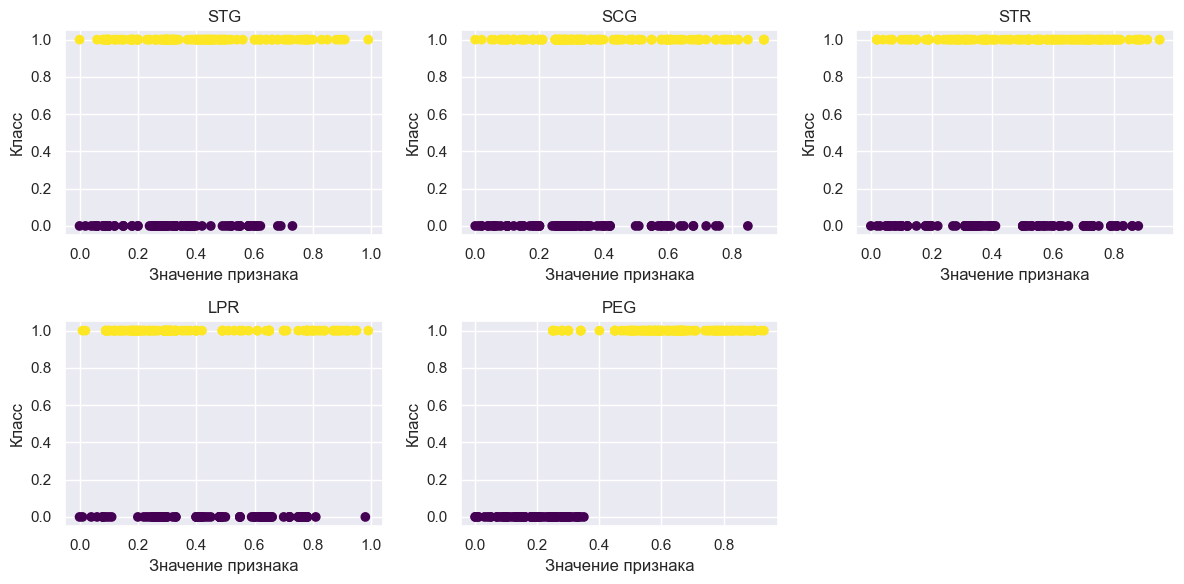

In [13]:
# Визуализация scatter-графиков для каждого признака
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)
    feature_vector = np.array(X[column])
    plt.scatter(feature_vector, y, c=y, cmap='viridis')
    plt.title(column)
    plt.xlabel("Значение признака")
    plt.ylabel("Класс")
    plt.grid()

plt.tight_layout()
plt.show()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
На основании кривых значений критерия Джини можно утверждать, что выборку следует делить на два поддерева по признаку PEG. График этого признака показывает четкий максимум, в то время как графики других признаков колеблются на примерно одном уровне. Это указывает на то, что признак PEG является наиболее информативным для данной задачи классификации.

Эти выводы подтверждаются визуальным анализом scatter-графиков: для признака PEG наблюдается явное разделение классов в зависимости от его значений. Функция find_best_split определяет оптимальный порог, равный 31.5, что соответствует визуально определенному порогу на scatter-графике. Это подчеркивает, что применение признака PEG и выбранного порога способствует наилучшему разделению классов и, в свою очередь, повышению точности модели.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from hw5code import DecisionTree

In [15]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head()

label_encoder = LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = label_encoder.fit_transform(mushrooms[column])
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [16]:
Y = np.array(mushrooms["p"])
X = np.array(mushrooms.drop(columns="p"))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [17]:
types = ["real"] * x_train.shape[1]
tree = DecisionTree(feature_types=types)
tree.fit(x_train, y_train)
print("train score: ", accuracy_score(y_train, tree.predict(x_train)))
print("test score: ", accuracy_score(y_test, tree.predict(x_test)))

train score:  1.0
test score:  1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [18]:
from sklearn.tree import DecisionTreeClassifier

tic_tac_toe = pd.read_csv('tic-tac-toe.data')

In [19]:
le = LabelEncoder()
for col_name in tic_tac_toe.columns:
    tic_tac_toe[col_name] = le.fit_transform(tic_tac_toe[col_name]) 

In [20]:
target_tic_tac_toe = np.array(tic_tac_toe['positive'])
features_tic_tac_toe = np.array(tic_tac_toe.drop('positive', axis=1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features_tic_tac_toe, target_tic_tac_toe, test_size=0.5, random_state=42)


v = np.arange(2, 25)
param_names = ['max_depth', 'min_samples_split', 'min_samples_leaf']

train_accuracy = np.empty((len(v), len(param_names)))
test_accuracy = np.empty((len(v), len(param_names)))

for j in range(len(v)):
    for i in range(len(param_names)):
        parameter = param_names[i]
        
        params = {parameter: v[j]}
        clf = DecisionTreeClassifier(**params).fit(X_train, y_train)
        
        train_accuracy[j, i] = clf.score(X_train, y_train)
        test_accuracy[j, i] = clf.score(X_test, y_test)

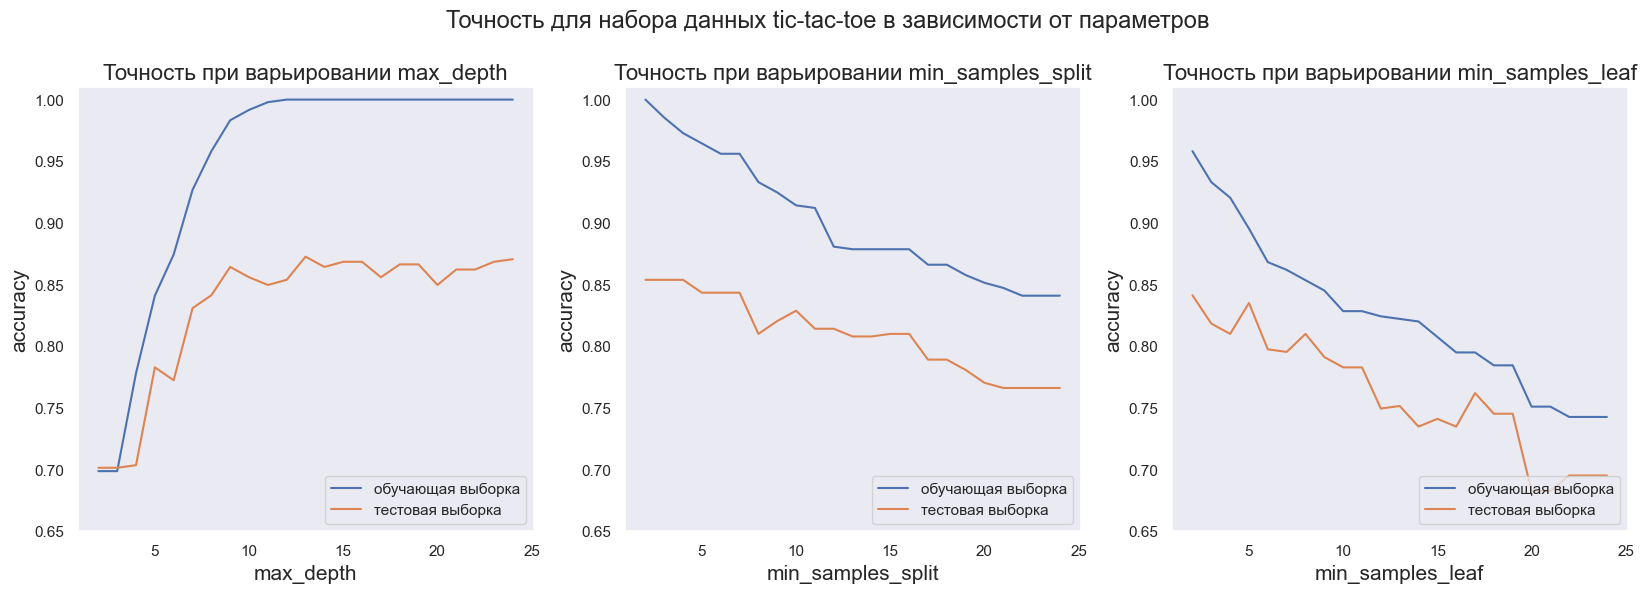

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Точность для набора данных tic-tac-toe в зависимости от параметров', fontsize=17)
plt.subplots_adjust(top=0.85)
for j in range(len(param_names)):
    ax[j].plot(v, train_accuracy[:, j], label='обучающая выборка')
    ax[j].plot(v, test_accuracy[:, j], label='тестовая выборка')
    ax[j].set_ylim(0.65, 1.01)
    ax[j].set_xlabel(param_names[j], fontsize=15)
    ax[j].set_ylabel('accuracy', fontsize=15)
    ax[j].set_title('Точность при варьировании ' + param_names[j], fontsize=16)
    ax[j].legend(loc='lower right')

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [23]:
from sklearn.model_selection import cross_val_score

cars = pd.read_csv('car.data')
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [24]:
cars.loc[(cars['unacc'] == 'unacc'), 'unacc'] = 'acc'
cars.loc[(cars['unacc'] == 'vgood'), 'unacc'] = 'good'
cars['unacc'].unique()

array(['acc', 'good'], dtype=object)

In [25]:
le = LabelEncoder()
for col_name in cars.columns:
    cars.loc[:, col_name] = le.fit_transform(cars.loc[:, col_name])
target_cars = cars['unacc']
features_cars = cars.drop('unacc', axis=1)

In [26]:
nursery = pd.read_csv('nursery.data')
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [27]:
nursery.loc[(nursery['recommend'] == 'not_recom'), 'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'), 'recommend'] = 'priority'
nursery['recommend'].unique()

array(['priority', 'recommend'], dtype=object)

In [28]:
le = LabelEncoder()
for col_name in nursery.columns:
    nursery.loc[:, col_name] = le.fit_transform(nursery.loc[:, col_name])
target_nursery = nursery['recommend']
features_nursery = nursery.drop('recommend', axis=1)

In [30]:
if X.ndim == 1:
    X = X.reshape(-1, 1)
if features_tic_tac_toe.ndim == 1:
    features_tic_tac_toe = features_tic_tac_toe.reshape(-1, 1)
if features_cars.ndim == 1:
    features_cars = features_cars.reshape(-1, 1)
if features_nursery.ndim == 1:
    features_nursery = features_nursery.reshape(-1, 1)


In [36]:
if X.ndim == 1:
    X = X.reshape(-1, 1)  # преобразуем X в двумерный массив, если он одномерный
if Y.ndim > 1:
    Y = Y.ravel()  # преобразуем Y в одномерный массив, если он двумерный
    
if target_cars.dtype == 'object':
    target_cars = label_encoder.fit_transform(target_cars)

# Применяем кодирование для целевой переменной nursery
if target_nursery.dtype == 'object':
    target_nursery = label_encoder.fit_transform(target_nursery)

In [37]:
print('Accuracy mushrooms:', cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring=make_scorer(accuracy_score)).mean())
print('Accuracy tic_tac_toe:', cross_val_score(DecisionTreeClassifier(), features_tic_tac_toe, target_tic_tac_toe, cv=10, scoring=make_scorer(accuracy_score)).mean())
print('Accuracy cars:', cross_val_score(DecisionTreeClassifier(), features_cars, target_cars, cv=10, scoring=make_scorer(accuracy_score)).mean())
print('Accuracy nursery:', cross_val_score(DecisionTreeClassifier(), features_nursery, target_nursery, cv=10, scoring=make_scorer(accuracy_score)))

Accuracy mushrooms: 0.9582898587606566
Accuracy tic_tac_toe: 0.7933771929824561
Accuracy cars: 0.9449522785320607
Accuracy nursery: [0.9992284 1.        0.9992284 1.        1.        1.        1.
 1.        1.        1.       ]


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**